In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('kc_house_data.csv')

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# Initial assumptions
* **id** - drop
* **dateDate** - house prices could be seasonal, keep for now
* **pricePrice** - this is the  **target**
* **bedroomsNumber** -  check for outliers, possibly make categorical
* **bathroomsNumber** -  check for outliers, possibly make categorical
* **sqft_livingsquare** -  numerical, check stats
* **sqft_lotsquare** -  numerical, check stats
* **floorsTotal** -  check for outliers, possibly make categorical, does this matter?
* **waterfront** - probably high value, but few houses
* **view** - Has been viewed, does this matter
* **condition** - Categorical
* **grade** - Categorical
* **sqft_above** - closely related to sqft_living space
* **sqft_basement** - square footage of the basement
* **yr_built** - may bin these years, new houses are desirable, so are established neighborhoods
* **yr_renovated** - new column for recent or not
* **zipcode** - zip - location, probably important
* **lat** - location - probably important
* **long** - location - probably important
* **sqft_living15** - if this can identify housing comps it is very relevant, else drop
* **sqft_lot15** - if this can identify housing comps it is very relevant, else drop


In [4]:
df.shape
# running stats. 21,000 rows, 21 columns

(21597, 21)

In [5]:
# quick preview of the data. Already see some NaN
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
# check end of the data too.
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [7]:
df.info()
# check the basic info of the data. Mainly numeric. 
# Date needs to be converted if we keep it. Why is sqft_basement and object?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [8]:
df.describe()
# check 5 point statistics. Things that jump out immediately: 
# #Bedrooms max 33; 
# sqft_lot sd>mean, max is very high; 
# floor 1-3.5; waterfront 0-1; view 0-4; condition 1-5; grade 3-13; build 1900-2015; renov - not sure
# zipcode, lat, log look as expected

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.isnull().sum()
# check for Nans: Waterfront, view, renov

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
# how many unique values does each column have?
for col in df:
    print(col, df[col].nunique())

id 21420
date 372
price 3622
bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 5
condition 5
grade 11
sqft_above 942
sqft_basement 304
yr_built 116
yr_renovated 70
zipcode 70
lat 5033
long 751
sqft_living15 777
sqft_lot15 8682


In [206]:
# investigate the counts of columns without a high number of unique values. First make a list, and then get value counts

low_uniq_col = []

for col in df:
    if df[col].nunique() < 30:
        low_uniq_col.append(df[col].name)
low_uniq_col

['bedrooms_1',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bedrooms_10',
 'bedrooms_11',
 'bathrooms_0_5',
 'bathrooms_0_75',
 'bathrooms_1_0',
 'bathrooms_1_25',
 'bathrooms_1_5',
 'bathrooms_1_75',
 'bathrooms_2_0',
 'bathrooms_2_25',
 'bathrooms_2_5',
 'bathrooms_2_75',
 'bathrooms_3_0',
 'bathrooms_3_25',
 'bathrooms_3_5',
 'bathrooms_3_75',
 'bathrooms_4_0',
 'bathrooms_4_25',
 'bathrooms_4_5',
 'bathrooms_4_75',
 'bathrooms_5_0',
 'bathrooms_5_25',
 'bathrooms_5_5',
 'bathrooms_5_75',
 'bathrooms_6_0',
 'bathrooms_6_25',
 'bathrooms_6_5',
 'bathrooms_6_75',
 'bathrooms_7_5',
 'bathrooms_7_75',
 'bathrooms_8_0',
 'floors_1_0',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1_0',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11'

In [208]:
# Column unique value counts

for col in df:
    if df[col].name in low_uniq_col:
        print('\n', col, '\n', df[col].value_counts(), df[col].value_counts().sum())



 bedrooms_1 
 0    21396
1      196
Name: bedrooms_1, dtype: int64 21592

 bedrooms_2 
 0    18833
1     2759
Name: bedrooms_2, dtype: int64 21592

 bedrooms_3 
 0    11768
1     9824
Name: bedrooms_3, dtype: int64 21592

 bedrooms_4 
 0    14712
1     6880
Name: bedrooms_4, dtype: int64 21592

 bedrooms_5 
 0    19992
1     1600
Name: bedrooms_5, dtype: int64 21592

 bedrooms_6 
 0    21320
1      272
Name: bedrooms_6, dtype: int64 21592

 bedrooms_7 
 0    21554
1       38
Name: bedrooms_7, dtype: int64 21592

 bedrooms_8 
 0    21579
1       13
Name: bedrooms_8, dtype: int64 21592

 bedrooms_9 
 0    21586
1        6
Name: bedrooms_9, dtype: int64 21592

 bedrooms_10 
 0    21589
1        3
Name: bedrooms_10, dtype: int64 21592

 bedrooms_11 
 0    21591
1        1
Name: bedrooms_11, dtype: int64 21592

 bathrooms_0_5 
 0    21588
1        4
Name: bathrooms_0_5, dtype: int64 21592

 bathrooms_0_75 
 0    21521
1       71
Name: bathrooms_0_75, dtype: int64 21592

 bathrooms_1_0 
 0 

In [13]:
# testing - adding column where waterfront has null value
df['water_null'] = np.where(df['waterfront'].isnull(), 1, 0)

In [14]:
df['water_null'].sum()

2376

In [15]:
df['water_null'].describe()

count    21597.000000
mean         0.110015
std          0.312916
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: water_null, dtype: float64

**investigate sqft_basement** - why is this column an object?
First, I'll look at unique values. Then I noticed that we have total living space and above living space. We could potentially calculate the missing basement values using those features

In [16]:
df.sqft_basement.unique()
# There's the problem. 5th item is  '?'

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [17]:
df.sqft_basement[0:8]
# Here's another view, direct from the column

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
Name: sqft_basement, dtype: object

In [18]:
# Create a new feature to calculate basement from total living area - above living area
df['basement2'] = df['sqft_living'] - df['sqft_above']

In [19]:
# A second new feature, that takes the numerical values from sqft_basement. Will keep the original for now to use as a filter
df['basement3'] = np.where(df['sqft_basement'] != '?', df['sqft_basement'], 0)

In [20]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,water_null,basement2,basement3
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,1,0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,400,400.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,0,0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0,910,910.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,0.0


In [21]:
# The new feature takes on the type property as an object. Need to convert it. Check the stats. Mainly zeros
df['basement3'] = df['basement3'].astype(float).astype(int, copy=False)
df.basement3.describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: basement3, dtype: float64

In [22]:
# Now the test. If we filter out the rows with '?', is the calculated feature the same as the orignal?
df['test'] = np.where(df['sqft_basement'] != '?',df['basement2'] - df['basement3'],0)

In [23]:
# Sum should be zero. It is!
df['test'].sum()

0

In [24]:
# New feature for renovated column.

In [25]:
# Can now drop the original, and placeholder columns
# df.drop("Unnamed: 0", axis=1, inplace=True)

**Run some visuals** 

Which graphs?

**Clean up Nan's** 

Waterfront - split database

Views - safe to replace

yr_renovate - safe to replace

drop 33 bedrooms

**Create split databases for Waterfront Nan and 0** 

First thought is to convert waterfront Nans to 0. Before we do that, let's check the 5 point stats

Will create split dataframe where waterfront = 0, waterfront = null, and waterfront = 1


In [26]:
# new dataframe for waterfront is null, using water_null column
df_water_null = df[df["water_null"] == 1]
print(df_water_null.shape)
df_water_null.describe()

(2376, 25)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,water_null,basement2,basement3,test
count,2.376000e+03,2.376000e+03,2376.000000,2376.000000,2376.000000,2.376000e+03,2376.000000,0.0,2370.000000,2376.000000,...,1946.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.0,2376.000000,2376.000000,2376.0
mean,4.484801e+09,5.294301e+05,3.361532,2.105745,2063.341330,1.530689e+04,1.486532,NaN,0.256540,3.408670,...,94.323227,98079.694865,47.561465,-122.213497,1980.507576,12366.675084,1.0,297.146465,292.798822,0.0
std,2.873451e+09,3.250794e+05,0.908079,0.764266,881.380488,4.595495e+04,0.535898,NaN,0.783974,0.652826,...,423.549734,53.949839,0.137431,0.140720,689.428551,24694.192000,0.0,440.511772,438.564289,0.0
min,1.000102e+06,8.000000e+04,1.000000,0.750000,430.000000,6.000000e+02,1.000000,NaN,0.000000,1.000000,...,0.000000,98001.000000,47.180800,-122.503000,780.000000,788.000000,1.0,0.000000,0.000000,0.0
25%,2.112250e+09,3.228750e+05,3.000000,1.500000,1430.000000,5.031750e+03,1.000000,NaN,0.000000,3.000000,...,0.000000,98033.750000,47.472925,-122.327000,1470.000000,5108.000000,1.0,0.000000,0.000000,0.0
50%,3.789200e+09,4.450000e+05,3.000000,2.250000,1900.000000,7.607000e+03,1.500000,NaN,0.000000,3.000000,...,0.000000,98070.000000,47.571400,-122.228000,1820.000000,7624.500000,1.0,0.000000,0.000000,0.0
75%,7.227501e+09,6.496125e+05,4.000000,2.500000,2520.000000,1.052475e+04,2.000000,NaN,0.000000,4.000000,...,0.000000,98118.000000,47.678000,-122.125750,2370.000000,10001.250000,1.0,600.000000,590.000000,0.0
max,9.839301e+09,3.200000e+06,8.000000,6.500000,7730.000000,1.074218e+06,3.500000,NaN,4.000000,5.000000,...,2015.000000,98199.000000,47.777400,-121.319000,4940.000000,311610.000000,1.0,2160.000000,2160.000000,0.0


In [27]:
# new dataframes for waterfront 0 and 1
df_water_no = df[df["waterfront"] == 0]
df_water_yes = df[df["waterfront"] == 1]

In [28]:
print(df_water_no.shape)
df_water_no.describe()

(19075, 25)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,water_null,basement2,basement3,test
count,1.907500e+04,1.907500e+04,19075.000000,19075.000000,19075.000000,1.907500e+04,19075.000000,19075.0,19019.000000,19075.000000,...,15688.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.0,19075.000000,19075.000000,19075.0
mean,4.593352e+09,5.326420e+05,3.374836,2.112543,2073.524404,1.499112e+04,1.493997,0.0,0.203954,3.408965,...,79.280087,98077.591140,47.560078,-122.213552,1982.052949,12729.486186,0.0,287.649279,281.445662,0.0
std,2.877189e+09,3.449592e+05,0.927144,0.764537,909.083746,4.077700e+04,0.539980,0.0,0.698385,0.649431,...,389.881401,53.373727,0.138857,0.140740,680.982492,27593.553043,0.0,437.333169,434.259744,0.0
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.0,0.000000,0.000000,0.0
25%,2.124079e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.036500e+03,1.000000,0.0,0.000000,3.000000,...,0.000000,98032.000000,47.471200,-122.328000,1490.000000,5100.000000,0.0,0.000000,0.000000,0.0
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.589000e+03,1.500000,0.0,0.000000,3.000000,...,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7600.000000,0.0,0.000000,0.000000,0.0
75%,7.334401e+09,6.386000e+05,4.000000,2.500000,2540.000000,1.058400e+04,2.000000,0.0,0.000000,4.000000,...,0.000000,98117.000000,47.678200,-122.125000,2350.000000,10031.500000,0.0,550.000000,530.000000,0.0
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,0.0,4130.000000,4130.000000,0.0


In [29]:
print(df_water_yes.shape)
df_water_yes.describe()

(146, 25)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,water_null,basement2,basement3,test
count,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,145.000000,146.000000,...,121.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,146.000000,146.000000,146.0
mean,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,1.0,3.786207,3.541096,...,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630,0.0,735.993151,728.458904,0.0
std,2.858045e+09,1.145385e+06,1.099169,1.121509,1652.134956,44629.075899,0.547895,0.0,0.555105,0.743957,...,852.484732,60.599756,0.113744,0.123772,808.410448,23264.085993,0.0,803.728076,808.010866,0.0
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,...,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000,0.0,0.000000,0.000000,0.0
25%,2.016369e+09,8.275000e+05,3.000000,1.812500,2082.500000,11692.250000,1.000000,1.0,4.000000,3.000000,...,0.000000,98040.000000,47.452550,-122.376000,2075.000000,11991.500000,0.0,0.000000,0.000000,0.0
50%,3.692780e+09,1.510000e+06,3.000000,2.500000,2900.000000,17730.500000,2.000000,1.0,4.000000,3.000000,...,0.000000,98075.000000,47.548150,-122.273500,2695.000000,16260.500000,0.0,560.000000,535.000000,0.0
75%,7.390450e+09,2.282500e+06,4.000000,3.250000,4117.500000,26692.500000,2.000000,1.0,4.000000,4.000000,...,0.000000,98155.000000,47.607550,-122.210000,3140.000000,24537.500000,0.0,1265.000000,1265.000000,0.0
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,...,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000,0.0,4820.000000,4820.000000,0.0


In [30]:
# Here's an alternative way to look at 5 point stats for waterfront without the need to create new databases

df.iloc[:, 1:9].groupby(['waterfront']).describe().transpose()

waterfront                  0.0           1.0
price       count  1.907500e+04  1.460000e+02
            mean   5.326420e+05  1.717215e+06
            std    3.449592e+05  1.145385e+06
            min    7.800000e+04  2.850000e+05
            25%    3.200000e+05  8.275000e+05
            50%    4.500000e+05  1.510000e+06
            75%    6.386000e+05  2.282500e+06
            max    7.700000e+06  7.060000e+06
bedrooms    count  1.907500e+04  1.460000e+02
            mean   3.374836e+00  3.349315e+00
            std    9.271436e-01  1.099169e+00
            min    1.000000e+00  1.000000e+00
            25%    3.000000e+00  3.000000e+00
            50%    3.000000e+00  3.000000e+00
            75%    4.000000e+00  4.000000e+00
            max    3.300000e+01  6.000000e+00
bathrooms   count  1.907500e+04  1.460000e+02
            mean   2.112543e+00  2.708904e+00
            std    7.645374e-01  1.121509e+00
            min    5.000000e-01  7.500000e-01
            25%    1.750000e+00  1.812500e+00
            50%    2.250000e+00  2.500000e+00
            75%    2.500000e+00  3.250000e+00
            max    8.000000e+00  6.750000e+00
sqft_living count  1.907500e+04  1.460000e+02
            mean   2.073524e+03  3.244753e+03
            std    9.090837e+02  1.652135e+03
            min    3.700000e+02  4.400000e+02
            25%    1.420000e+03  2.082500e+03
            50%    1.910000e+03  2.900000e+03
            75%    2.540000e+03  4.117500e+03
            max    1.354000e+04  1.004000e+04
sqft_lot    count  1.907500e+04  1.460000e+02
            mean   1.499112e+04  2.587088e+04
            std    4.077700e+04  4.462908e+04
            min    5.200000e+02  1.989000e+03
            25%    5.036500e+03  1.169225e+04
            50%    7.589000e+03  1.773050e+04
            75%    1.058400e+04  2.669250e+04
            max    1.651359e+06  5.051660e+05
floors      count  1.907500e+04  1.460000e+02
            mean   1.493997e+00  1.630137e+00
            std    5.399798e-01  5.478950e-01
            min    1.000000e+00  1.000000e+00
            25%    1.000000e+00  1.000000e+00
            50%    1.500000e+00  2.000000e+00
            75%    2.000000e+00  2.000000e+00
            max    3.500000e+00  3.000000e+00

In [31]:
# or looking at just the mean in a couple of columns
df.groupby('waterfront')['price', 'bedrooms'].mean()

,price,bedrooms
waterfront,,
0.0,5.326420e+05,3.374836
1.0,1.717215e+06,3.349315


In [32]:
# The statistics for waterfront = 0, and waterfront = null look very similar. Ok to change NaNs to zero
df.waterfront = df.waterfront.fillna(0)

In [33]:
print(df['waterfront'].value_counts())

0.0    21451
1.0      146
Name: waterfront, dtype: int64


In [34]:
# view only has 63 null values. Ok to change NaNs to zero
df.view = df.view.fillna(0)

In [35]:
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [36]:
# yr_renovated requires a year for the renovation. The vast majority of this column is zero. 
# With no additional information to go on, it's safest to change Nan's to zero

df.yr_renovated = df.yr_renovated.fillna(0)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
water_null       21597 non-null int32
basement2        21597 non-null int64

**Drop Columns**

Now that we've cleaned up NaN's and '?'s. Let's drop some columns

In [38]:
df = df.drop(['id', 'date', 'water_null', 'sqft_basement', 'basement3', 'test'], axis =1)
print(df.shape)
df.head()

(21597, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [39]:
df.loc[(df['bedrooms'] == 33)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
15856,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,1947,0.0,98103,47.6878,-122.331,1330,4700,580


In [40]:
df.drop(df[df["bedrooms"] == 33].index, inplace = True)

In [41]:
df.shape

(21596, 19)

In [42]:
df.loc[df['price'] > 6000000]
# reluctant to drop price data. Hold as test scenario
# df.drop(df.loc[df['price'] > 6000000].index, inplace = True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
3910,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,1940,2001.0,98004,47.6500,-122.214,3930,25449,2360
7245,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,1910,1987.0,98102,47.6298,-122.323,3940,8800,3480
9245,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,2001,0.0,98039,47.6305,-122.240,4540,42730,1030


In [43]:
df.loc[df['sqft_lot'] > 1000000]
df.drop(df.loc[df['sqft_lot'] > 1000000].index, inplace = True)

In [44]:
df.loc[df['sqft_lot'] > 500000]
# df.drop(df.loc[df['sqft_lot15'] > 500000].index, inplace = True)
# not sure that I'm going to use this column

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
2962,999000.0,3,2.75,2830,505166,1.0,1.0,3.0,4,8,1830,1962,0.0,98070,47.3782,-122.514,2120,21988,1000
3945,998000.0,4,3.25,3770,982998,2.0,0.0,0.0,3,10,3770,1992,0.0,98058,47.4140,-122.087,2290,37141,0
4437,790000.0,2,3.00,2560,982278,1.0,0.0,0.0,3,8,2560,2004,0.0,98014,47.6955,-121.861,1620,40946,0
4536,550000.0,3,2.00,3650,843309,2.0,0.0,0.0,4,7,3650,1991,0.0,98070,47.3627,-122.496,1870,273992,0
6685,2000000.0,2,2.50,3900,920423,2.0,0.0,0.0,3,12,3900,2009,0.0,98065,47.5371,-121.756,2720,411962,0
7070,1650000.0,4,3.25,3920,881654,3.0,0.0,3.0,3,11,3920,2002,0.0,98024,47.5385,-121.896,2970,112384,0
7287,700000.0,2,1.75,1679,577605,2.0,0.0,0.0,3,9,1679,2001,0.0,98070,47.4630,-122.475,1850,358934,0
9705,937500.0,4,4.00,5545,871200,2.0,0.0,0.0,3,11,3605,2003,0.0,98014,47.6760,-121.882,3420,871200,1940
12906,428000.0,3,1.75,1580,507038,1.0,0.0,2.0,4,7,1580,1985,0.0,98022,47.2303,-121.936,2040,210394,0
12993,750000.0,3,2.50,2350,715690,1.5,0.0,0.0,4,9,2350,1979,0.0,98022,47.1622,-121.971,1280,325393,0


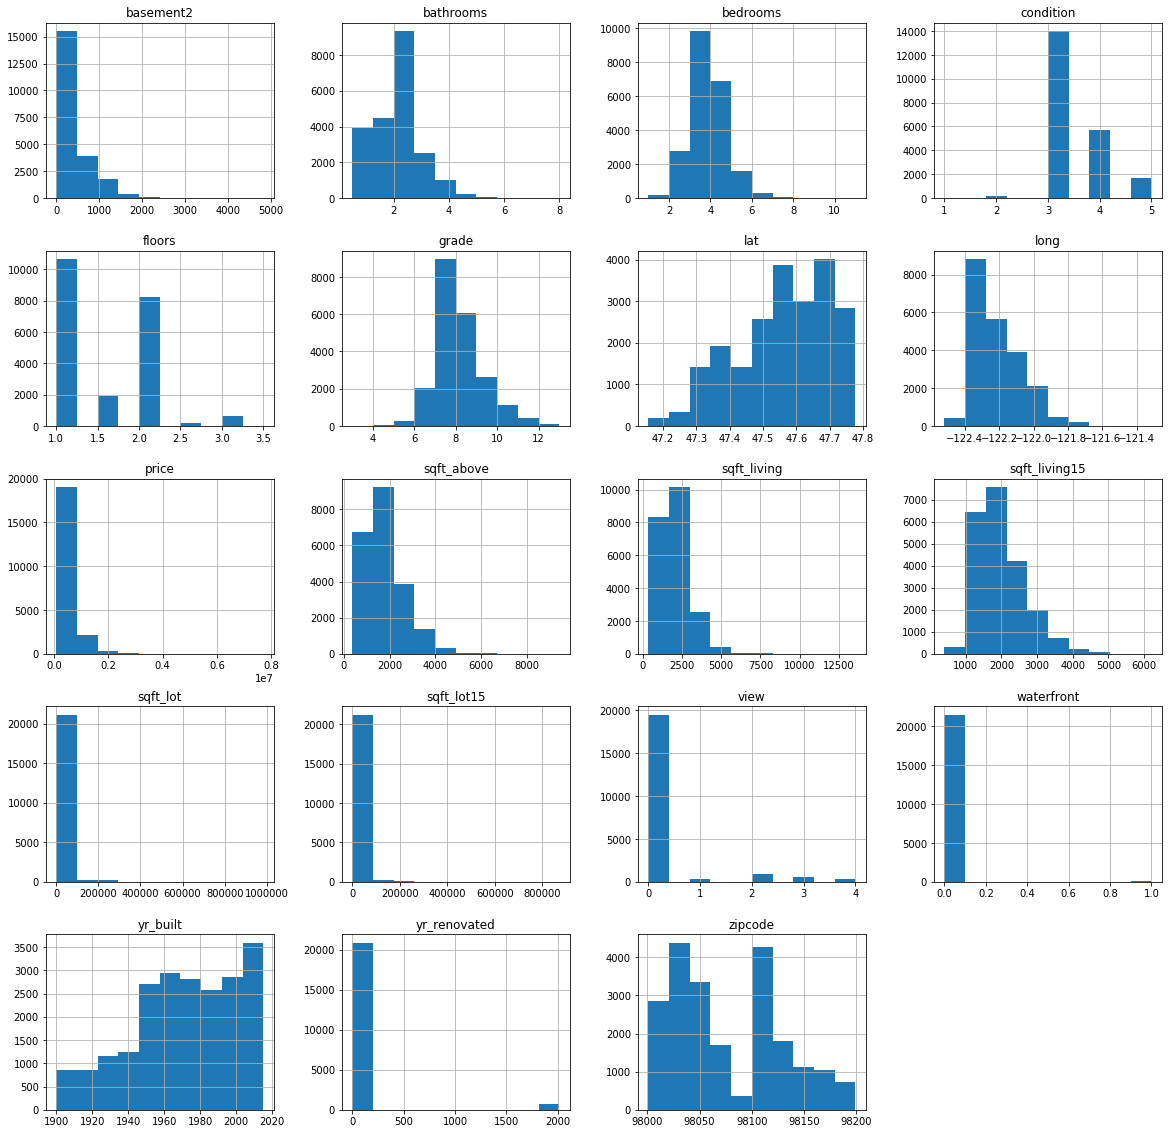

In [45]:
df.hist(figsize = (20,20));

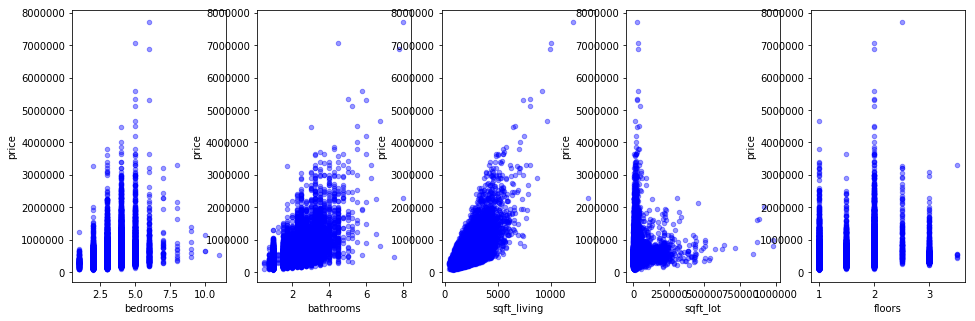

In [46]:
xlist = df.iloc[:, 1:6]
xlist.head()

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,5))
for col, ax in zip(list(xlist), axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

# df.plot(kind='scatter', x='xlist', y='price', alpha=0.4, color='b');

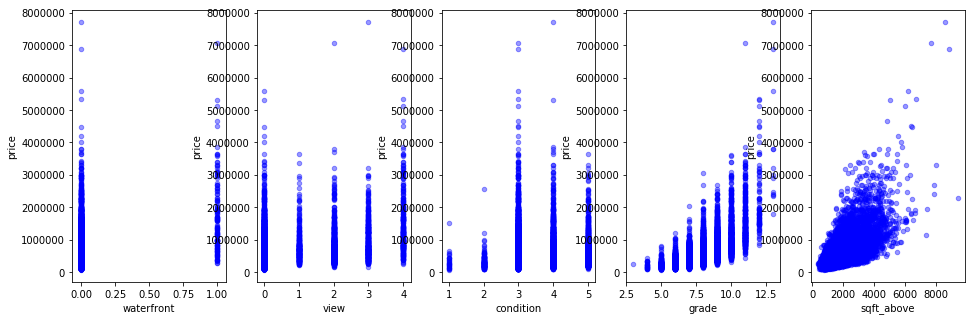

In [47]:
xlist2 = df.iloc[:, 6:11]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,5))
for col, ax in zip(list(xlist2), axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

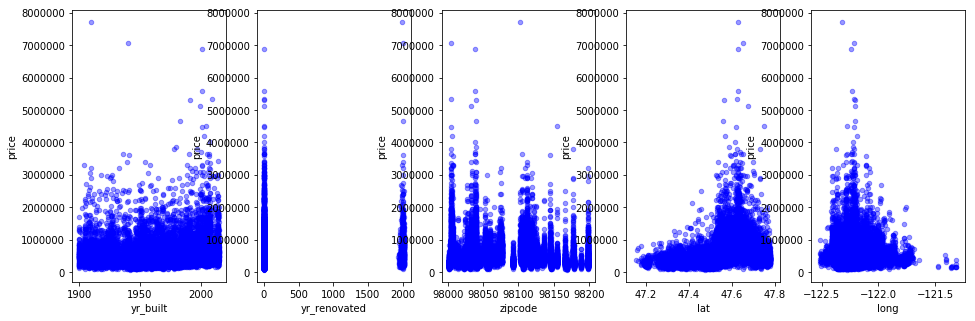

In [48]:
xlist3 = df.iloc[:, 11:16]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,5))
for col, ax in zip(list(xlist3), axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

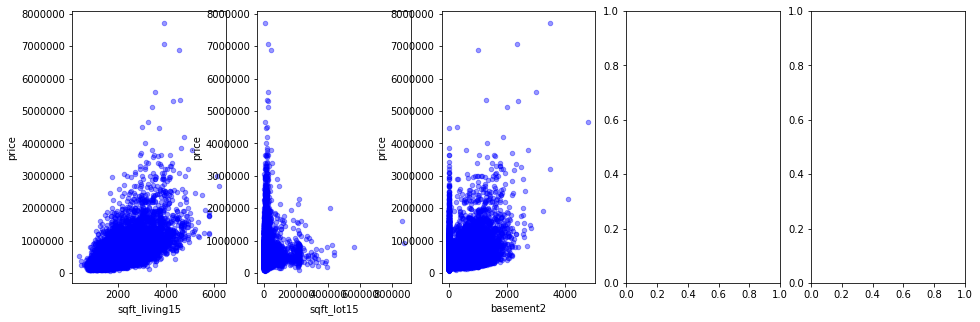

In [49]:
xlist4 = df.iloc[:, 16:]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,5))
for col, ax in zip(list(xlist4), axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

# New Columns

The master scatter plot doesn't show much detail for renovation, because most of the values are zero.
If you exclude 0, the price for houses with renovation seems to be increasing, especially around 2000.
Here's an example of a scatter plot renovated vs price for 2000 and beyond.

Let's add a column to capture this

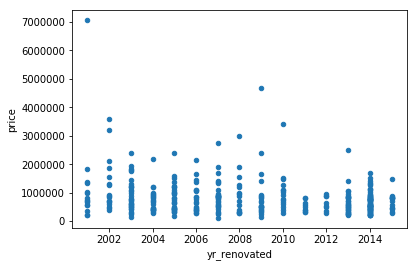

In [50]:
df_reno = df[df["yr_renovated"] > 2000]
df_reno.plot(kind='scatter', x='yr_renovated', y='price');


In [51]:
df_reno.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2
count,3.500000e+02,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,8.338057e+05,3.608571,2.463571,2414.745714,10458.208571,1.505714,0.017143,0.454286,3.057143,7.951429,1869.082857,1942.934286,2008.554286,98098.434286,47.588782,-122.274126,1967.700000,9524.154286,545.662857
std,6.562883e+05,1.011926,0.861419,1136.265913,17551.585022,0.497813,0.129989,1.058150,0.277407,1.185121,868.137661,23.308538,4.515643,54.538438,0.109541,0.119166,729.341504,12583.653066,590.096443
min,1.100000e+05,1.000000,1.000000,580.000000,1306.000000,1.000000,0.000000,0.000000,3.000000,5.000000,580.000000,1900.000000,2001.000000,98001.000000,47.196000,-122.479000,828.000000,1281.000000,0.000000
25%,4.387500e+05,3.000000,1.750000,1627.500000,4800.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1252.500000,1924.000000,2005.000000,98042.750000,47.539100,-122.362000,1452.500000,4818.000000,0.000000
50%,7.040000e+05,4.000000,2.500000,2310.000000,6757.500000,1.500000,0.000000,0.000000,3.000000,8.000000,1720.000000,1946.000000,2008.000000,98115.000000,47.605700,-122.295500,1800.000000,6675.000000,530.000000
75%,9.703750e+05,4.000000,3.000000,2957.500000,9981.500000,2.000000,0.000000,0.000000,3.000000,9.000000,2300.000000,1961.000000,2013.000000,98126.000000,47.666325,-122.215000,2340.000000,10075.250000,910.000000
max,7.060000e+06,9.000000,6.750000,10040.000000,224769.000000,3.000000,1.000000,4.000000,5.000000,13.000000,7680.000000,2003.000000,2015.000000,98199.000000,47.777000,-121.359000,5500.000000,173804.000000,4820.000000


In [52]:
df['reno_recent'] = np.where(df['yr_renovated'] > 2000, 1, 0)

# Location, Location, Location

It's almost universally known that the most import 3 factors in real estate are location, location, location.

Any property assement is based primary on the selling price of similar sized houses in that neighborhood.

With this in mind we have 5 location features currently in our data frame: zipcode, latitude and longitude, and sqft_living15 and sqft_lot15. Unfortunately housing price as it relates to zipcode, lat and long is not linear. You can't expect that as a zipcode increases, the house price will increase too. High priced neighborhoods can be right next to inexpense ones, not in a line from lowest to highest. sqft--15 features could be useful in indentifying comp houses. At the moment this type of back-propagation is beyond my knowledge. I'll leave these in, to see if the model can find anything.

A future project could be to build a new attribute using latitude and longitude. (For example: The haversine formula determines the shortest distance between two points on a sphere given their longitudes and latitudes). Other projects could be, adding in income by zipcode, adding in school district information.

For this exercise I'm going to experiment using Seattle as a desirable location. Does the distance (north or south, east or west) from Seattle impact King Count housing prices?

The Co-ordinates for downtown Seattle are: 47.608013, -122.335167

In [53]:
# calculating distance
# Seattle = 47.608013, -122.335167
# approx one degree of latitude ellipsoidal earth at 47N: 69.08 miles


def distance(Lat2, Long2):
    Lat1 = 47.608013
    Long1 = -122.335167
    x = Lat2 - Lat1
    y = (Long2 - Long1) * np.cos((Lat2 + Lat1)*(0.5 * np.pi/180))  
    return 69.08 * np.sqrt(x*x + y*y)

distance(47.5112, -122.257)

7.616113362022828

In [54]:
df['Miles_Seattle'] = df.apply(lambda x: distance(x['lat'], x['long']), axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement2,reno_recent,Miles_Seattle
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,7.616113
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,0,7.841298
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0,10.153451
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,1965,0.0,98136,47.5208,-122.393,1360,5000,910,0,6.600281
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,13.526635


In [55]:
df['north_Seattle'] = np.where(df['lat'] > 47.608013 , 1, 0)
df['east_Seattle'] = np.where(df['long'] > -122.335167 , 1, 0)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,basement2,reno_recent,Miles_Seattle,north_Seattle,east_Seattle
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,98178,47.5112,-122.257,1340,5650,0,0,7.616113,0,1
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,98125,47.7210,-122.319,1690,7639,400,0,7.841298,1,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,98028,47.7379,-122.233,2720,8062,0,0,10.153451,1,1
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,98136,47.5208,-122.393,1360,5000,910,0,6.600281,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,98074,47.6168,-122.045,1800,7503,0,0,13.526635,1,1


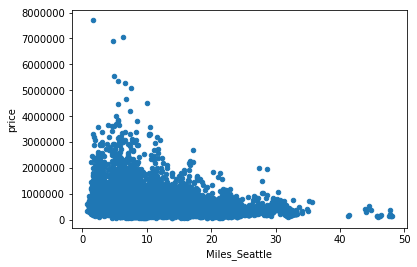

In [56]:
df.plot(kind='scatter', x='Miles_Seattle', y='price');

# Run initial model as a baseline
* **run as a test** - see how we can improve this

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [58]:
data_mini = df[['price', 'sqft_living', 'Miles_Seattle', 'north_Seattle']]
data_mini.head()

,price,sqft_living,Miles_Seattle,north_Seattle
0,221900.0,1180,7.616113,0
1,538000.0,2570,7.841298,1
2,180000.0,770,10.153451,1
3,604000.0,1960,6.600281,0
4,510000.0,1680,13.526635,1


In [59]:
formula = "price ~ sqft_living"
model = ols(formula= formula, data=data_mini).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 17 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:27:05   Log-Likelihood:            -2.9999e+05
No. Observations:               21592   AIC:                         6.000e+05
Df Residuals:                   21590   BIC:                         6.000e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.413e+04   4410.867    -10.004      0.000   -5.28e+04   -3.55e+04
sqft_living   280.9258      1.940    144.821      0.000     277.124     284.728
==============================================================================
Omnibus:                    14796.225   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542285.051
Skew:                           2.819   Prob(JB):                         0.00
Kurtosis:                      26.895   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
outcome = 'price'
predictors = data_mini.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [61]:
model = ols(formula= formula, data=data_mini).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                 1.196e+04
Date:                Mon, 17 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:27:06   Log-Likelihood:            -2.9675e+05
No. Observations:               21592   AIC:                         5.935e+05
Df Residuals:                   21588   BIC:                         5.935e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.357e+04   5034.288     16.599      0.000    7.37e+04    9.34e+04
sqft_living     288.6753      1.676    172.199      0.000     285.389     291.961
Miles_Seattle -1.613e+04    247.831    -65.084      0.000   -1.66e+04   -1.56e+04
north_Seattle  9.943e+04   3333.397     29.830      0.000    9.29e+04    1.06e+05
==============================================================================
Omnibus:                    17228.881   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1068314.327
Skew:                           3.374   Prob(JB):                         0.00
Kurtosis:                      36.792   Cond. No.                     7.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
target = df[['price']]
data_pred = df[['sqft_living', 'Miles_Seattle', 'north_Seattle']]

In [63]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(data_pred, target)
print(linreg.intercept_)
print(linreg.coef_)

[83566.0808629]
[[   288.67525071 -16129.90212913  99434.21033299]]


In [64]:
# how to drop one predictor - orig_3 in sk learn
# predictors = predictors.drop("orig_3",axis=1)
# linreg.fit(predictors, y)
# linreg.coef_

In [65]:
yhat = linreg.predict(data_pred)

In [66]:
y = target

$SS_{residual} = \sum (y - \hat{y})^2 $

$SS_{total} = \sum (y - \bar{y})^2 $

$R^2 = 1- \dfrac{SS_{residual}}{SS_{total}}$

$R^2_{adj}= 1-(1-R^2)\dfrac{n-1}{n-p-1}$

In [67]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-data_pred.shape[1]-1)

In [68]:
print(r_squared)
print(adjusted_r_squared)

price    0.624387
dtype: float64
price    0.624335
dtype: float64


## To categorical: binning

Some variables do not seem to have a linear pattern between predictor and target here. We will group the data into bins so that each varaible is treated as a categorical variables. 

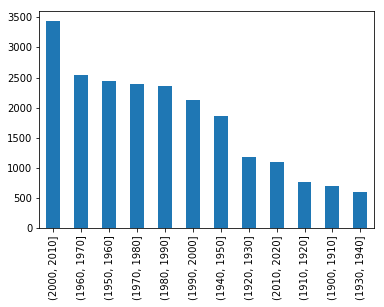

In [69]:
# create bins for based on observed values.
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
# use pd.cut
bins_yr = pd.cut(df['yr_built'], bins)

# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_yr = bins_yr.cat.as_unordered()
bins_yr.head()

# inspect the result
bins_yr.value_counts().plot(kind='bar')


In [70]:
#alternative way of bins (for severalcols at once)

# bins = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']

# for i in range (1, 6):
#     df["binned_markdown_" + str(i)] = pd.cut(df["MarkDown" + str(i)], 5, labels=bins)

In [71]:
# replace the existing "yr_built" column
df["yr_built"]=bins_yr

## Identifying multicollinearity

In [72]:
# Hold off running this - takes a long time
# pd.plotting.scatter_matrix(df,figsize  = [15, 15]);

In [73]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,basement2,reno_recent,Miles_Seattle,north_Seattle,east_Seattle
price,1.000000,0.315913,0.525948,0.701963,0.097815,0.256787,0.264321,0.393566,0.035952,0.668015,...,-0.053423,0.306871,0.021994,0.585283,0.083005,0.323847,0.102554,-0.286702,0.255259,0.030362
bedrooms,0.315913,1.000000,0.527831,0.593154,0.034345,0.183680,-0.002048,0.080676,0.023085,0.366122,...,-0.158577,-0.011372,0.136521,0.404499,0.031420,0.309198,0.033624,0.061760,-0.022318,0.159402
bathrooms,0.525948,0.527831,1.000000,0.755668,0.097586,0.502514,0.063643,0.186379,-0.126706,0.665721,...,-0.204876,0.024323,0.224900,0.570023,0.089692,0.283404,0.058054,0.083975,0.012827,0.142869
sqft_living,0.701963,0.593154,0.755668,1.000000,0.189807,0.353839,0.104659,0.282018,-0.059591,0.762701,...,-0.199868,0.052273,0.241163,0.756566,0.185894,0.435194,0.046763,0.075692,0.020827,0.174696
sqft_lot,0.097815,0.034345,0.097586,0.189807,1.000000,-0.003331,0.023984,0.076147,-0.010803,0.128819,...,-0.136114,-0.088341,0.240341,0.156852,0.757290,0.017876,-0.014988,0.253805,-0.047646,0.091096
floors,0.256787,0.183680,0.502514,0.353839,-0.003331,1.000000,0.020791,0.028566,-0.264129,0.458686,...,-0.059599,0.049261,0.125982,0.280124,-0.010141,-0.245759,0.002753,0.003030,0.050209,0.013079
waterfront,0.264321,-0.002048,0.063643,0.104659,0.023984,0.020791,1.000000,0.380672,0.016666,0.082833,...,0.028913,-0.012167,-0.037617,0.083828,0.030891,0.082809,0.016260,-0.014081,-0.028516,-0.023117
view,0.393566,0.080676,0.186379,0.282018,0.076147,0.028566,0.380672,1.000000,0.045533,0.249456,...,0.085237,0.006727,-0.077904,0.278876,0.070980,0.274081,0.037138,-0.075702,-0.031643,-0.088138
condition,0.035952,0.023085,-0.126706,-0.059591,-0.010803,-0.264129,0.016666,0.045533,1.000000,-0.147075,...,0.002850,-0.014958,-0.105789,-0.093171,-0.003971,0.173626,-0.069594,-0.073120,-0.001898,-0.039290
grade,0.668015,0.366122,0.665721,0.762701,0.128819,0.458686,0.082833,0.249456,-0.147075,1.000000,...,-0.185950,0.113669,0.200456,0.714091,0.122652,0.168226,0.032108,0.006551,0.092313,0.119297


In [74]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,basement2,reno_recent,Miles_Seattle,north_Seattle,east_Seattle
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [75]:
import seaborn as sns

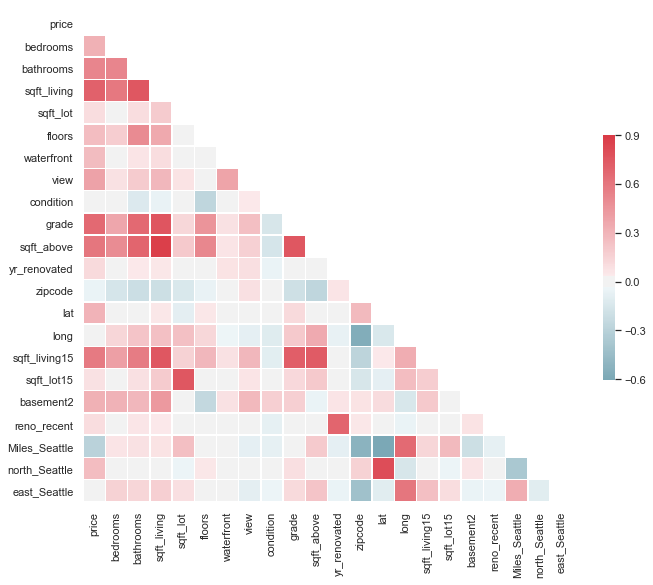

In [76]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [78]:
# remove problematic features
# df = df.drop("NOX",axis=1)
df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15', 'view', 'yr_renovated'], axis =1)
print(df.shape)
df.head(2)

# bathrooms, grade, lat, long, 
# view - remove earlier most values are zero
# yr_renovated - remove after binning

(21592, 18)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,basement2,reno_recent,Miles_Seattle,north_Seattle,east_Seattle
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,"(1950, 1960]",98178,47.5112,-122.257,0,0,7.616113,0,1
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,"(1950, 1960]",98125,47.7210,-122.319,400,0,7.841298,1,1


In [205]:
df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

KeyError: 'zipcode'

In [85]:
# drop zipcode for now - may add in later

df = df.drop(['zipcode'], axis =1)
print(df.shape)
df.head(2)

(21592, 17)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long,basement2,reno_recent,Miles_Seattle,north_Seattle,east_Seattle
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,"(1950, 1960]",47.5112,-122.257,0,0,7.616113,0,1
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,"(1950, 1960]",47.7210,-122.319,400,0,7.841298,1,1


## Make Categorical

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 0 to 21596
Data columns (total 17 columns):
price            21592 non-null float64
bedrooms         21592 non-null int64
bathrooms        21592 non-null float64
sqft_living      21592 non-null int64
sqft_lot         21592 non-null int64
floors           21592 non-null float64
waterfront       21592 non-null float64
condition        21592 non-null int64
grade            21592 non-null int64
yr_built         21505 non-null category
lat              21592 non-null float64
long             21592 non-null float64
basement2        21592 non-null int64
reno_recent      21592 non-null int32
Miles_Seattle    21592 non-null float64
north_Seattle    21592 non-null int32
east_Seattle     21592 non-null int32
dtypes: category(1), float64(7), int32(3), int64(6)
memory usage: 2.6 MB


In [87]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'lat', 'long',
       'basement2', 'reno_recent', 'Miles_Seattle', 'north_Seattle',
       'east_Seattle'],
      dtype='object')

In [88]:
# label columns as categorical where required
df["bedrooms"] = df["bedrooms"].astype('category')
df["bathrooms"] = df["bathrooms"].astype('category')
df["floors"] = df["floors"].astype('category')
df["waterfront"] = df["waterfront"].astype('category')
df["condition"] = df["condition"].astype('category')
df["grade"] = df["grade"].astype('category')
df["yr_built"] = df["yr_built"].astype('category')
#df["zipcode"] = df["zipcode"].astype('category')
df["reno_recent"] = df["reno_recent"].astype('category')
df["north_Seattle"] = df["north_Seattle"].astype('category')
df["east_Seattle"] = df["east_Seattle"].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 0 to 21596
Data columns (total 17 columns):
price            21592 non-null float64
bedrooms         21592 non-null category
bathrooms        21592 non-null category
sqft_living      21592 non-null int64
sqft_lot         21592 non-null int64
floors           21592 non-null category
waterfront       21592 non-null category
condition        21592 non-null category
grade            21592 non-null category
yr_built         21505 non-null category
lat              21592 non-null float64
long             21592 non-null float64
basement2        21592 non-null int64
reno_recent      21592 non-null category
Miles_Seattle    21592 non-null float64
north_Seattle    21592 non-null category
east_Seattle     21592 non-null category
dtypes: category(10), float64(4), int64(3)
memory usage: 1.5 MB


## Create dummy variables

In [89]:
df = pd.get_dummies(df)

In [90]:
df.head()

,price,sqft_living,sqft_lot,lat,long,basement2,Miles_Seattle,bedrooms_1,bedrooms_2,bedrooms_3,...,"yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2010]","yr_built_(2010, 2020]",reno_recent_0,reno_recent_1,north_Seattle_0,north_Seattle_1,east_Seattle_0,east_Seattle_1
0,221900.0,1180,5650,47.5112,-122.257,0,7.616113,0,0,1,...,0,0,0,0,1,0,1,0,0,1
1,538000.0,2570,7242,47.7210,-122.319,400,7.841298,0,0,1,...,0,0,0,0,1,0,0,1,0,1
2,180000.0,770,10000,47.7379,-122.233,0,10.153451,0,1,0,...,0,0,0,0,1,0,0,1,0,1
3,604000.0,1960,5000,47.5208,-122.393,910,6.600281,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,510000.0,1680,8080,47.6168,-122.045,0,13.526635,0,0,1,...,1,0,0,0,1,0,0,1,0,1


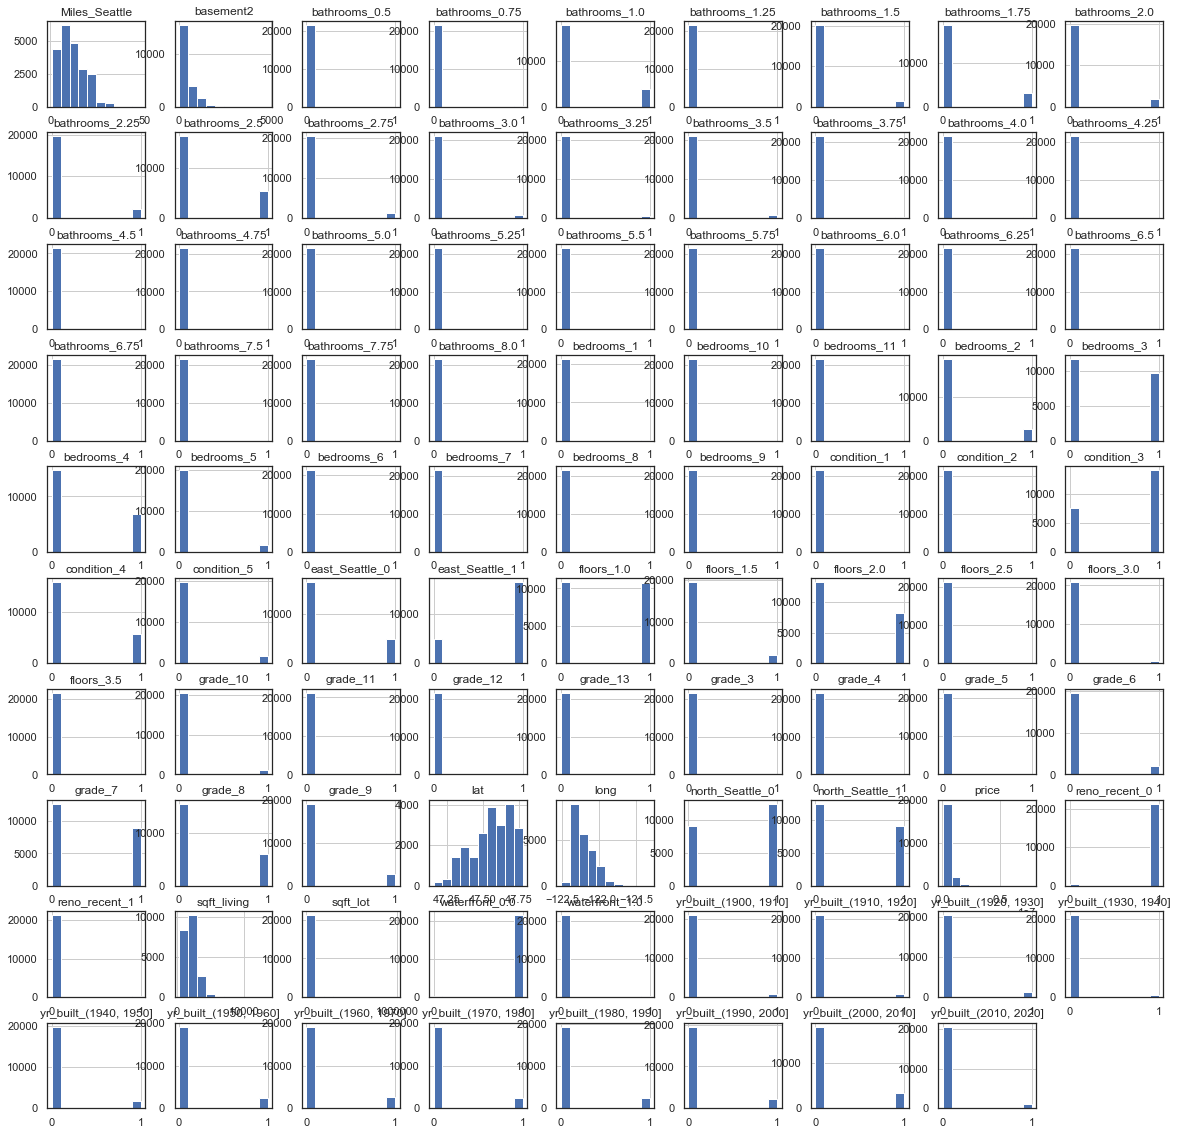

In [91]:
# initial
df.hist(figsize = [20,20]);

In [92]:
df.columns = [col.replace(' ', '_') for col in df.columns]

In [93]:
df.columns = [col.replace('.', '_') for col in df.columns]

In [94]:
df.columns = [col.replace(',', '') for col in df.columns]
df.columns = [col.replace('(', '') for col in df.columns]
df.columns = [col.replace(']', '') for col in df.columns]

In [95]:
df.columns.tolist()

['price',
 'sqft_living',
 'sqft_lot',
 'lat',
 'long',
 'basement2',
 'Miles_Seattle',
 'bedrooms_1',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bedrooms_10',
 'bedrooms_11',
 'bathrooms_0_5',
 'bathrooms_0_75',
 'bathrooms_1_0',
 'bathrooms_1_25',
 'bathrooms_1_5',
 'bathrooms_1_75',
 'bathrooms_2_0',
 'bathrooms_2_25',
 'bathrooms_2_5',
 'bathrooms_2_75',
 'bathrooms_3_0',
 'bathrooms_3_25',
 'bathrooms_3_5',
 'bathrooms_3_75',
 'bathrooms_4_0',
 'bathrooms_4_25',
 'bathrooms_4_5',
 'bathrooms_4_75',
 'bathrooms_5_0',
 'bathrooms_5_25',
 'bathrooms_5_5',
 'bathrooms_5_75',
 'bathrooms_6_0',
 'bathrooms_6_25',
 'bathrooms_6_5',
 'bathrooms_6_75',
 'bathrooms_7_5',
 'bathrooms_7_75',
 'bathrooms_8_0',
 'floors_1_0',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_0_0',
 'waterfront_1_0',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 

In [96]:
# drop zero one hot encoded columns, this is included as the inverse of '1' columns
df = df.drop(['waterfront_0_0', 'reno_recent_0', 'north_Seattle_0', 'east_Seattle_0'], axis =1)
print(df.shape)
df.head(2)

(21592, 85)


,price,sqft_living,sqft_lot,lat,long,basement2,Miles_Seattle,bedrooms_1,bedrooms_2,bedrooms_3,...,yr_built_1950_1960,yr_built_1960_1970,yr_built_1970_1980,yr_built_1980_1990,yr_built_1990_2000,yr_built_2000_2010,yr_built_2010_2020,reno_recent_1,north_Seattle_1,east_Seattle_1
0,221900.0,1180,5650,47.5112,-122.257,0,7.616113,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,538000.0,2570,7242,47.7210,-122.319,400,7.841298,0,0,1,...,1,0,0,0,0,0,0,0,1,1


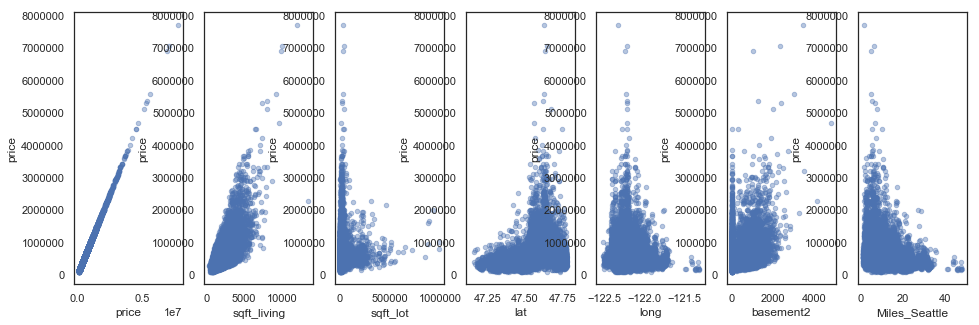

In [97]:
xlist5 = df.iloc[:, 0:7]

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(16,5))
for col, ax in zip(list(xlist5), axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

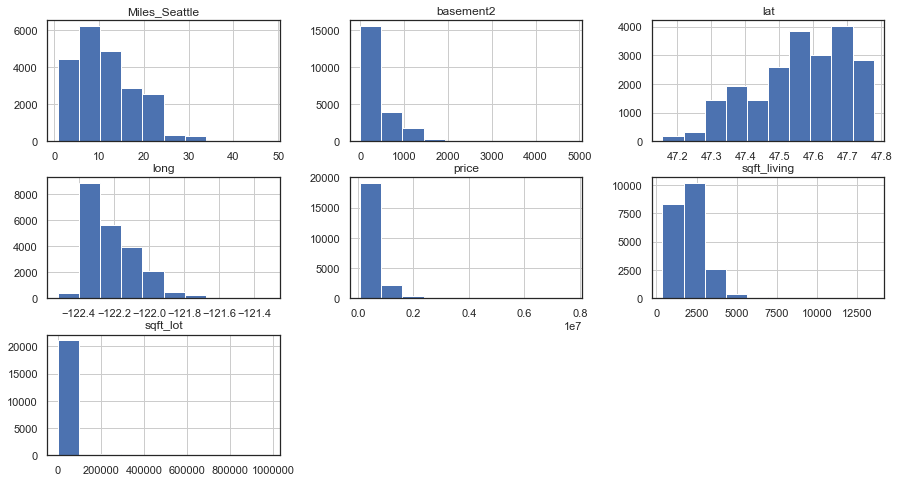

In [98]:
xlist5.hist(figsize = (15,8));

In [99]:
# drop lat and log - represented by miles from Seattle, and north, east columns
df = df.drop(['lat', 'long'], axis =1)
print(df.shape)

(21592, 83)


## Perform log transformations for the variables where it makes sense

In [100]:
# or this way
logprice = np.log(df['price'])
loglive = np.log(df['sqft_living'])
loglot = np.log(df['sqft_lot'])
logmiles = np.log(df['Miles_Seattle'])
logbase = np.log(df['basement2']+1)

# minmax scaling
df['price'] = (logprice-min(logprice))/(max(logprice)-min(logprice))
df['sqft_living'] = (loglive-min(loglive))/(max(loglive)-min(loglive))
df['sqft_lot'] = (loglot-min(loglot))/(max(loglot)-min(loglot))
df['Miles_Seattle'] = (logmiles-min(logmiles))/(max(logmiles)-min(logmiles))
df['basement2'] = (logbase-min(logbase))/(max(logbase)-min(logbase))


### Normalized histograms with kde plots to explore the distributions of continuous variables in the dataset

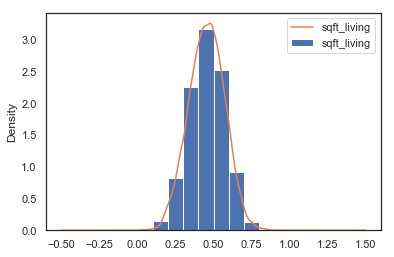

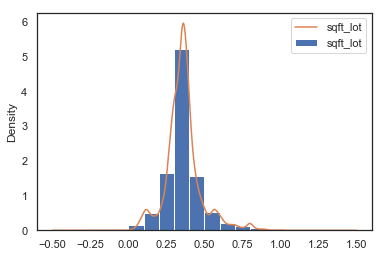

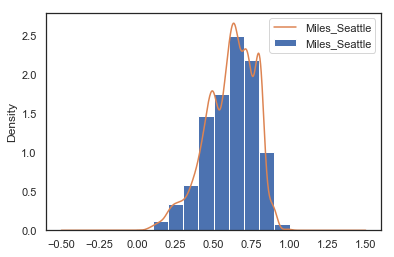

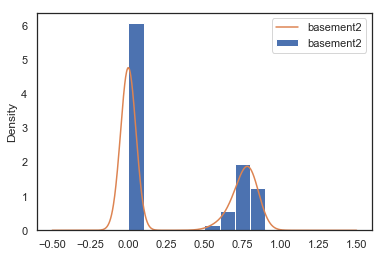

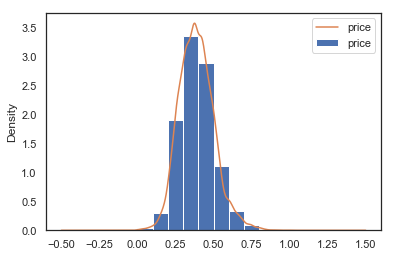

In [101]:
for column in ['sqft_living',
       'sqft_lot', 'Miles_Seattle', 'basement2', 'price']:
    df[column].plot.hist(density=True )
    df[column].plot.kde(label=column )
    plt.legend()
    plt.show()

### Joint plots: Check for the linearity assumption between predictors and target variable

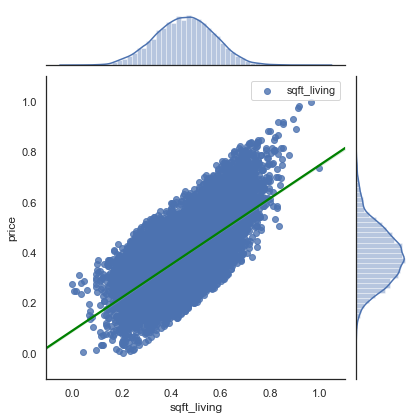

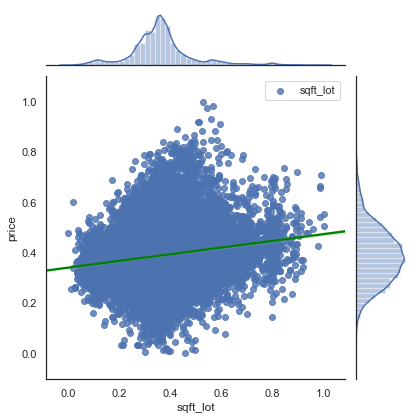

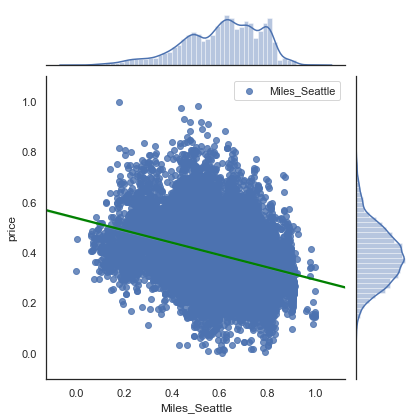

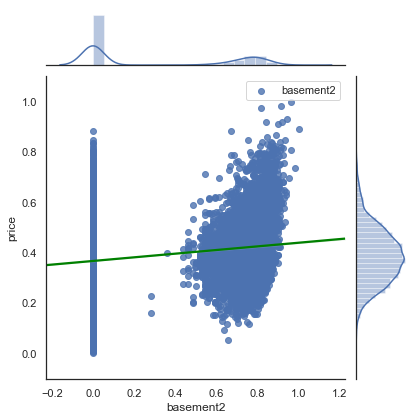

In [102]:
for column in ['sqft_living',
       'sqft_lot', 'Miles_Seattle', 'basement2']:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})

    plt.legend()
    plt.show()

In [ ]:
# Modeling Your Data 

see 11-10, 11-11, 12-9

In [103]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [104]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

# Rather than typing out all the predictors: formula = "price ~ sqft_living+sqft_lot+basement2+Miles_Seattle+bedrooms_1 ..."
# First seperate out the outcome variable price, and then use a "+".join() command on the predictors

In [105]:
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1068.
Date:                Mon, 17 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:39:37   Log-Likelihood:                 33109.
No. Observations:               21592   AIC:                        -6.606e+04
Df Residuals:                   21514   BIC:                        -6.544e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2182      0.007     29.744      0.000       0.204       0.233
sqft_living            0.4008      0.007     54.612      0.000       0.386       0.415
sqft_lot               0.1372      0.004     30.930      0.000       0.128       0.146
basement2             -0.0162      0.001    -12.352      0.000      -0.019      -0.014
Miles_Seattle         -0.2827      0.003    -83.068      0.000      -0.289      -0.276
bedrooms_1             0.0441      0.007      6.346      0.000       0.031       0.058
bedrooms_2             0.0375      0.006      6.247      0.000       0.026       0.049
bedrooms_3             0.0301      0.006      5.093      0.000       0.019       0.042
bedrooms_4             0.0261      0.006      4.407      0.000       0.014       0.038
bedrooms_5             0.0228      0.006      3.802      0.000       0.011       0.035
bedrooms_6             0.0099      0.007      1.513      0.130      -0.003       0.023
bedrooms_7            -0.0034      0.010     -0.348      0.728      -0.023       0.016
bedrooms_8            -0.0007      0.015     -0.050      0.960      -0.029       0.028
bedrooms_9             0.0086      0.022      0.386      0.699      -0.035       0.052
bedrooms_10            0.0403      0.028      1.413      0.158      -0.016       0.096
bedrooms_11            0.0030      0.048      0.062      0.951      -0.091       0.097
bathrooms_0_5         -0.0606      0.026     -2.354      0.019      -0.111      -0.010
bathrooms_0_75        -0.0118      0.008     -1.466      0.143      -0.028       0.004
bathrooms_1_0         -0.0173      0.005     -3.529      0.000      -0.027      -0.008
bathrooms_1_25        -0.0199      0.018     -1.134      0.257      -0.054       0.014
bathrooms_1_5         -0.0182      0.005     -3.727      0.000      -0.028      -0.009
bathrooms_1_75        -0.0096      0.005     -2.016      0.044      -0.019      -0.000
bathrooms_2_0         -0.0128      0.005     -2.682      0.007      -0.022      -0.003
bathrooms_2_25        -0.0025      0.005     -0.522      0.602      -0.012       0.007
bathrooms_2_5         -0.0040      0.005     -0.875      0.382      -0.013       0.005
bathrooms_2_75         0.0007      0.005      0.138      0.890      -0.009       0.010
bathrooms_3_0         -0.0061      0.005     -1.249      0.212      -0.016       0.003
bathrooms_3_25         0.0082      0.005      1.651      0.099      -0.002       0.018
bathrooms_3_5          0.0089      0.005      1.827      0.068      -0.001       0.018
bathrooms_3_75         0.0180      0.006      3.004      0.003       0.006       0.030
bathrooms_4_0          0.0158      0.006      2.572      0.010       0.004       0.028
bathrooms_4_25         0.0297      0.007      4.146      0.000       0.016       0.044
bathrooms_4_5          0.0120      0.0

In [106]:
print('R2: ', model.rsquared)

R2:  0.7925874148362986


In [107]:
# things to try - 
#     bin bedrooms over 6
#     bin bathrooms - or drop
#     floors - ok, but don't mean much
#     cond 1 - p val error
#     grade 3 - p val error
#     yr build - p val error before 1940
#     zip error - 98010, 98014, 98019, 98028, 98133
    
    

In [108]:
target = df[['price']]
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(predictors, target)
print(linreg.intercept_)

[2.34105207e+11]


In [121]:
print(linreg.coef_)

[[ 4.00792002e-01  1.37488730e-01 -1.64691397e-02 -2.84050746e-01
   1.30197363e-02  5.27796230e-03 -2.15082633e-03 -6.25894313e-03
  -9.86312656e-03 -2.08725549e-02 -3.31597991e-02 -3.20469426e-02
  -1.93005967e-02 -8.72979021e+09 -8.72979021e+09 -8.72979021e+09
  -8.72979021e+09 -8.72979021e+09 -8.72979021e+09 -8.72979021e+09
  -8.72979021e+09 -8.72979021e+09 -8.72979021e+09 -8.72979021e+09
  -8.72979021e+09 -8.72979021e+09 -8.72979021e+09 -8.72979021e+09
  -8.72979021e+09 -8.72979021e+09 -8.72979021e+09 -8.72979021e+09
  -8.72979021e+09 -8.72979021e+09 -8.72979021e+09 -8.72979021e+09
  -8.72979021e+09 -8.72979021e+09 -8.72979021e+09 -8.72979021e+09
  -8.72979021e+09 -8.72979021e+09  2.07310440e+10  2.07310440e+10
   2.07310440e+10  2.07310440e+10  2.07310440e+10  2.07310440e+10
   1.42637228e-01  4.40665983e+10  4.40665983e+10  4.40665983e+10
   4.40665983e+10  4.40665983e+10 -4.69868730e+10 -4.69868730e+10
  -4.69868730e+10 -4.69868730e+10 -4.69868730e+10 -4.69868730e+10
  -4.69868

In [110]:
yhat = linreg.predict(predictors)
y = target
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-predictors.shape[1]-1)

In [111]:
print(r_squared)
print(adjusted_r_squared)

price    0.792486
dtype: float64
price    0.791695
dtype: float64


### Drop variable to make the coefficients the same for Scikit-learn vs Statsmodels

In [147]:
predictors2 = predictors.drop(['bedrooms_11', 'bathrooms_8_0', 'condition_1', 'floors_3_5', 'grade_3',], axis=1)
predictors2.head()


,sqft_living,sqft_lot,basement2,Miles_Seattle,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,...,yr_built_1950_1960,yr_built_1960_1970,yr_built_1970_1980,yr_built_1980_1990,yr_built_1990_2000,yr_built_2000_2010,yr_built_2010_2020,reno_recent_1,north_Seattle_1,east_Seattle_1
0,0.322166,0.316200,0.000000,0.554718,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.538392,0.349104,0.706774,0.561765,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,0.203585,0.391875,0.000000,0.624257,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0.463123,0.300001,0.803532,0.520099,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.420302,0.363617,0.000000,0.693626,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [148]:
X_int2 = sm.add_constant(predictors2)
model = sm.OLS(y,X_int2).fit()
model.summary()

C:\Users\andrew\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1068.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        00:35:13   Log-Likelihood:                 33109.
No. Observations:               21592   AIC:                        -6.606e+04
Df Residuals:                   21514   BIC:                        -6.544e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3002      0.087      3.450      0.001       0.130       0.471
sqft_living            0.4008      0.007     54.612      0.000       0.386       0.415
sqft_lot               0.1372      0.004     30.930      0.000       0.128       0.146
basement2             -0.0162      0.001    -12.352      0.000      -0.019      -0.014
Miles_Seattle         -0.2827      0.003    -83.068      0.000      -0.289      -0.276
bedrooms_1             0.0412      0.053      0.783      0.433      -0.062       0.144
bedrooms_2             0.0346      0.052      0.660      0.509      -0.068       0.137
bedrooms_3             0.0272      0.052      0.519      0.604      -0.076       0.130
bedrooms_4             0.0231      0.052      0.441      0.659      -0.080       0.126
bedrooms_5             0.0198      0.052      0.378      0.705      -0.083       0.123
bedrooms_6             0.0069      0.052      0.132      0.895      -0.096       0.110
bedrooms_7            -0.0064      0.053     -0.120      0.904      -0.111       0.098
bedrooms_8            -0.0037      0.054     -0.068      0.946      -0.110       0.103
bedrooms_9             0.0056      0.057      0.098      0.922      -0.107       0.118
bedrooms_10            0.0373      0.061      0.615      0.539      -0.082       0.156
bathrooms_0_5         -0.0833      0.047     -1.786      0.074      -0.175       0.008
bathrooms_0_75        -0.0345      0.039     -0.881      0.378      -0.111       0.042
bathrooms_1_0         -0.0400      0.039     -1.035      0.301      -0.116       0.036
bathrooms_1_25        -0.0426      0.042     -1.006      0.315      -0.126       0.040
bathrooms_1_5         -0.0409      0.039     -1.059      0.290      -0.117       0.035
bathrooms_1_75        -0.0323      0.039     -0.837      0.403      -0.108       0.043
bathrooms_2_0         -0.0355      0.039     -0.921      0.357      -0.111       0.040
bathrooms_2_25        -0.0252      0.039     -0.653      0.514      -0.101       0.050
bathrooms_2_5         -0.0268      0.039     -0.694      0.488      -0.102       0.049
bathrooms_2_75        -0.0220      0.039     -0.572      0.567      -0.098       0.054
bathrooms_3_0         -0.0288      0.039     -0.747      0.455      -0.104       0.047
bathrooms_3_25        -0.0146      0.039     -0.378      0.706      -0.090       0.061
bathrooms_3_5         -0.0138      0.039     -0.359      0.719      -0.089       0.062
bathrooms_3_75        -0.0047      0.039     -0.121      0.904      -0.080       0.071
bathrooms_4_0         -0.0069      0.039     -0.180      0.857      -0.083       0.069
bathrooms_4_25         0.0070      0.039      0.181      0.856      -0.069       0.083
bathrooms_4_5         -0.0107      0.039     -0.276      0.783      -0.087       0.065
bathrooms_4_75         0.0148      0.0

In [114]:
model.params

const                 0.238786
sqft_living           0.400792
sqft_lot              0.137178
basement2            -0.016213
Miles_Seattle        -0.282685
bedrooms_1            0.013377
bedrooms_2            0.006777
bedrooms_3           -0.000630
bedrooms_4           -0.004703
bedrooms_5           -0.007998
bedrooms_6           -0.020913
bedrooms_7           -0.034196
bedrooms_8           -0.031496
bedrooms_9           -0.022160
bathrooms_0_5        -0.059899
bathrooms_0_75       -0.011133
bathrooms_1_0        -0.016565
bathrooms_1_25       -0.019170
bathrooms_1_5        -0.017474
bathrooms_1_75       -0.008891
bathrooms_2_0        -0.012135
bathrooms_2_25       -0.001789
bathrooms_2_5        -0.003365
bathrooms_2_75        0.001342
bathrooms_3_0        -0.005424
bathrooms_3_25        0.008838
bathrooms_3_5         0.009553
bathrooms_3_75        0.018708
bathrooms_4_0         0.016447
bathrooms_4_25        0.030430
                        ...   
condition_2           0.026287
conditio

In [149]:
linreg.fit(predictors2, target)
print(linreg.intercept_)
print(linreg.coef_)

[0.30017991]
[[ 4.00782858e-01  1.37183389e-01 -1.62157373e-02 -2.82685456e-01
   4.11838969e-02  3.45872703e-02  2.71817822e-02  2.31084850e-02
   1.98143856e-02  6.90215631e-03 -6.38631581e-03 -3.68761978e-03
   5.62482710e-03  3.72986736e-02 -8.32928795e-02 -3.45290117e-02
  -3.99627967e-02 -4.25615531e-02 -4.08690334e-02 -3.22854655e-02
  -3.55340836e-02 -2.51812934e-02 -2.67566358e-02 -2.20490294e-02
  -2.87919540e-02 -1.45539343e-02 -1.38383442e-02 -4.68532848e-03
  -6.94762745e-03  7.03498330e-03 -1.06947794e-02  1.47772016e-02
   8.28330685e-03  1.35169193e-02  1.32138999e-02 -3.17108886e-02
   4.20356965e-02  4.61610177e-02  1.77182407e-02 -6.85112719e-02
  -1.52242092e-01  1.11830705e-01  3.22615686e-02  2.58063650e-02
   2.40861492e-02  1.84837079e-02  6.69966418e-03  1.41178431e-01
   2.08595584e-02  4.72023607e-02  6.57977205e-02  7.77899959e-02
  -1.14748714e-01 -1.25104182e-01 -1.11956342e-01 -8.18059305e-02
  -4.74336158e-02 -1.05715684e-02  2.40282421e-02  5.46313190e-

## Checking for Normality / Homoscedasticity

In [150]:
import statsmodels.api as sm
import scipy.stats as stats

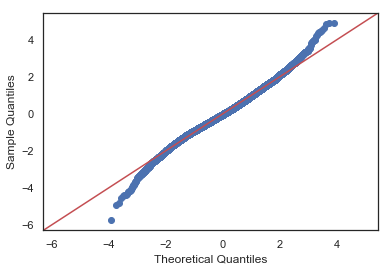

In [151]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

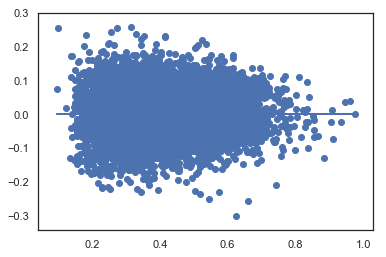

In [152]:
plt.scatter(model.predict(X_int2), model.resid)
plt.plot(model.predict(X_int2), [0 for i in range(len(df))])


In [ ]:
## do this before removing outliers. then run tests again

## Feature ranking with recursive feature elimination

In [154]:
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 2)
selector = selector.fit(predictors, data_fin['price'])

NameError: name 'data_fin' is not defined

In [ ]:
selector.support_ 

In [ ]:
selector.ranking_

In [ ]:
or ...

In [ ]:
y = walmart_final[["Weekly_Sales"]]
X = walmart_final.drop(["Weekly_Sales"], axis=1)
X.head()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
r_list = []
adj_r_list = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

In [ ]:
or

In [ ]:
Use feature ranking to select the 5 most important features

In [184]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 10)
selector = selector.fit(predictors2, y)

C:\Users\andrew\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [185]:
selector.support_

array([ True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [186]:
selected_columns = predictors2.columns[selector.support_ ]
linreg.fit(predictors2[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [187]:
selected_columns

Index(['sqft_living', 'sqft_lot', 'Miles_Seattle', 'bathrooms_6_25',
       'bathrooms_6_75', 'bathrooms_7_5', 'bathrooms_7_75', 'waterfront_1_0',
       'grade_12', 'grade_13'],
      dtype='object')

In [188]:
yhat = linreg.predict(predictors[selected_columns])

In [189]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-predictors[selected_columns].shape[1]-1)

In [190]:
r_squared

price    0.672825
dtype: float64

In [191]:
adjusted_r_squared

price    0.672673
dtype: float64

## Including a train-test-split

It is pretty straightforward that, to evaluate our model, you'll want to compare your predicted values, $\hat y$ with the actual value, $y$. The difference between the two values is referred to as the residuals. When using a train test split, you'll compare your residuals for both test set and training set:

$r_{i,train} = y_{i,train} - \hat y_{i,train}$ 

$r_{i,test} = y_{i,test} - \hat y_{i,test}$ 

To get a summarized measure over all the instances in the test set and training set, a popular metric is the (Root) Mean Squared Error:

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}$

MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

Again, you can compute these for both the traing and the test set. A big difference in value between the test and training set (R)MSE is an indication of overfitting.

Let's create a similar for loop to what we did before. Except, this time
- Use a train test split of 20-80
- Instead of looking at $R^2$ and $R^2_{adj}$, look at the MSE for train and test

In [192]:
X = predictors2

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [194]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17273 4319 17273 4319


In [195]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [196]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0027145732650237036
Test Mean Squarred Error: 0.0027886405628111946


In [ ]:
# aim - Great, there does not seem to be a big difference between the train and test MSE!

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

price    0.004511
dtype: float64
price    0.004525
dtype: float64
price    0.003508
dtype: float64
price    0.003566
dtype: float64
price    0.002888
dtype: float64
price    0.002984
dtype: float64
price    0.002832
dtype: float64
price    0.002914
dtype: float64
price    0.002776
dtype: float64
price    0.00287
dtype: float64
price    0.002733
dtype: float64
price    1.431089e+17
dtype: float64
price    0.002714
dtype: float64
price    1.837889e+15
dtype: float64
price    0.002709
dtype: float64
price    4.442838e+17
dtype: float64
price    0.002709
dtype: float64
price    8.140589e+17
dtype: float64


## 10-fold cross validation with the final model

In [198]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [199]:
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")

In [200]:
cv_5_results

array([-0.00283005, -0.00280715, -0.00269349, -0.00281302, -0.00276561])

In [201]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# select 15 best predictors

select_15 = RFE(linreg, n_features_to_select = 15)
select_15 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-2.77804868e-03, -2.56614840e+17, -2.81113076e-03, -2.79590888e-03,
       -2.64269380e-03, -2.73858343e-03, -2.67746859e-03, -2.92720139e-03,
       -2.85152481e-03, -2.68198613e-03])

In [202]:
select_15

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=85, step=1, verbose=0)

In [203]:
selected_columns

Index(['sqft_living', 'sqft_lot', 'basement2', 'Miles_Seattle', 'bedrooms_1',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
       'bathrooms_0_5', 'bathrooms_0_75', 'bathrooms_1_0', 'bathrooms_1_25',
       'bathrooms_1_5', 'bathrooms_1_75', 'bathrooms_2_0', 'bathrooms_2_25',
       'bathrooms_2_5', 'bathrooms_2_75', 'bathrooms_3_0', 'bathrooms_3_25',
       'bathrooms_3_5', 'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25',
       'bathrooms_4_5', 'bathrooms_4_75', 'bathrooms_5_0', 'bathrooms_5_25',
       'bathrooms_5_5', 'bathrooms_5_75', 'bathrooms_6_0', 'bathrooms_6_25',
       'bathrooms_6_5', 'bathrooms_6_75', 'bathrooms_7_5', 'bathrooms_7_75',
       'floors_1_0', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'waterfront_1_0', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 